In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl, tqdm
from matplotlib.pyplot import *

In [2]:
ntype = 'base'
types = ['id','la','co','LA']
num = 10
p = {}
p['id'] = prjlib.analysis_init(t='id',ntype='cv')
p['LA'] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
p['la'] = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype=ntype+'_roll50')
p['co'] = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype+'_roll50')

In [29]:
lmax, l = {}, {}
for c in types: lmax[c] = 4096
lmax['co'] = 2048
for c in types: l[c] = np.linspace(0,lmax[c],lmax[c]+1)

In [30]:
Elm, Blm = {}, {}
for c in types:
    for i in tqdm.tqdm(range(1,num+1)):
        Elm[c,i] = pickle.load(open(p[c].fcmb.alms['o']['E'][i],"rb"))[:lmax[c]+1,:lmax[c]+1]
        Blm[c,i] = pickle.load(open(p[c].fcmb.alms['o']['B'][i],"rb"))[:lmax[c]+1,:lmax[c]+1]

100%|██████████| 10/10 [00:22<00:00,  2.23s/it]


In [32]:
EE, BB, xE, xB = {}, {}, {}, {}
for c in types:
    for i in tqdm.tqdm(range(1,num+1)):
        EE[c,i] = curvedsky.utils.alm2cl(lmax[c],Elm[c,i])
        BB[c,i] = curvedsky.utils.alm2cl(lmax[c],Blm[c,i])
        xE[c,i] = curvedsky.utils.alm2cl(lmax[c],Elm[c,i],Elm['id',i][:lmax[c]+1,:lmax[c]+1])
        xB[c,i] = curvedsky.utils.alm2cl(lmax[c],Blm[c,i],Blm['id',i][:lmax[c]+1,:lmax[c]+1])

100%|██████████| 10/10 [02:37<00:00, 15.72s/it]


In [33]:
rhoE, rhoB = {}, {} 
for c in types:
    rhoE[c], rhoB[c] = 0., 0.
    for i in tqdm.tqdm(range(1,num+1)):
        rhoE[c] += xE[c,i]**2/EE[c,i]/EE['id',i][:lmax[c]+1]/num
        rhoB[c] += xB[c,i]**2/BB[c,i]/BB['id',i][:lmax[c]+1]/num

  0%|          | 0/10 [00:00<?, ?it/s]/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
100%|██████████| 10/10 [00:00<00:00, 3802.98it/s]


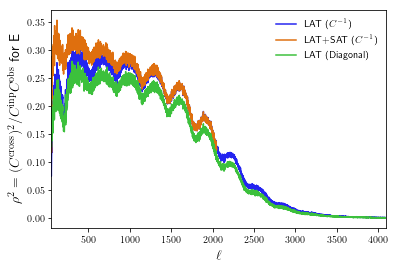

In [35]:
pl.plot_1dstyle(usetex=True,fsize=[6,4],xlab='$\ell$',ylab=r'$\rho^2=(C^{\rm cross})^2/C^{\rm inp}C^{\rm obs}$ for E',xmin=51,xmax=4096)
for c, lab in zip(types,['',r'LAT ($C^{-1}$)',r'LAT+SAT ($C^{-1}$)',r'LAT (Diagonal)']):
    if c=='id': continue
    plot(l[c],rhoE[c],label=lab)
legend()
savefig('fig_cinv_rho_EE.pdf')

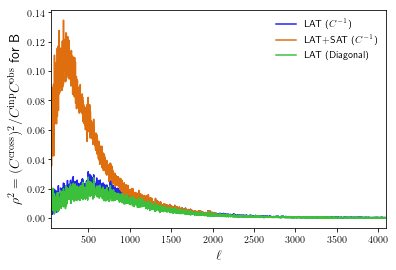

In [37]:
pl.plot_1dstyle(usetex=True,fsize=[6,4],xlab='$\ell$',ylab=r'$\rho^2=(C^{\rm cross})^2/C^{\rm inp}C^{\rm obs}$ for B',xmin=51,xmax=4096)
for c, lab in zip(types,['',r'LAT ($C^{-1}$)',r'LAT+SAT ($C^{-1}$)',r'LAT (Diagonal)']):
    if c=='id': continue
    plot(l[c],rhoB[c],label=lab)
legend()
savefig('fig_cinv_rho_BB.pdf')